# Comparaison des différentes méthodes

In [1]:
import random
import time
import statistics
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import zero_one_loss
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn import datasets

## Introduction
Dans cette partie, nous séléctionnons nos meilleurs modèles de chaque méthode afin de les comparer. Nous faisons cette comparaison en prenant comme training set les 10 000 premières images du MNIST, et comme test set les 5 000 suivantes.

## Création, entrainement et comparaison

In [2]:
# Chargement du dataset MNIST
X, Y = fetch_openml('mnist_784', return_X_y = True, as_frame = False) 

# 10000 Données pour l'entrainement
training_data = X[:10000]
training_target = Y[:10000]

# 5000 autres données sont utilisées pour les tests
test_data = X[10000:15000]
test_target = Y[10000:15000]

Nous créons les 3 modèles à comparer (K-NN, A-NN, SVM). On mesure ensuite le temps d'entrainement de chacun.

In [9]:
time_KNN, time_ANN, time_SVM = 0, 0, 0
# K-NN avec k = 9
st = time.time()
KNN_clf = neighbors.KNeighborsClassifier(9, n_jobs=-1).fit(training_data, training_target)
time_KNN = time.time() - st

# A-NN ADAM, relu et alpha=0.1
hidden_layer_s = []
for i in range (0, 11):
    hidden_layer_s.append(15)
st = time.time()
ANN_clf = MLPClassifier(activation="relu", alpha=0.1, hidden_layer_sizes =  (), solver = "adam", verbose=False).fit(training_data, training_target)
time_ANN = time.time() - st

# SVM
time_SVM = time.time()
SVM_clf = SVC(C = 1, kernel="rbf").fit(training_data, training_target)
time_SVM = time.time() - st

On mesure le temps de prediction de chaque méthode.

In [38]:
st = time.time()
score_KNN = KNN_clf.score(test_data, test_target)
time_KNN_pred = time.time() - st

st = time.time()
score_ANN = ANN_clf.score(test_data, test_target)
time_ANN_pred = time.time() - st

st = time.time()
score_SVM = SVM_clf.score(test_data, test_target)
time_SVM_pred = time.time() - st

On peut maintenant comparer les méthodes.

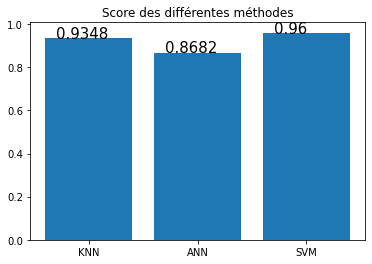

In [32]:
plt.figure()
scores = [score_KNN, score_ANN, score_SVM]
plt.bar(["KNN", "ANN", "SVM"], scores)
plt.text(x=-0.3 , y =score_KNN , s=f"{score_KNN}" , fontdict=dict(fontsize=15))
plt.text(x=0.7 , y =score_ANN , s=f"{score_ANN}" , fontdict=dict(fontsize=15))
plt.text(x=1.7 , y =score_SVM , s=f"{score_SVM}" , fontdict=dict(fontsize=15))
plt.title("Score des différentes méthodes")
plt.show()

Nous pouvons apercevoir sur le graphique ci-dessus que la méthode nous permettant d'avoir la meilleure précision est celle des Machines à Vecteurs de Support, en comparaison avec la méthode des K-Plus proches voisins et les ANN (Artificial Neural Networks, avec les perceptrons multi-couche)


On regarde maintenant le temps d'entrainement et de prédiction de chaque méthode.

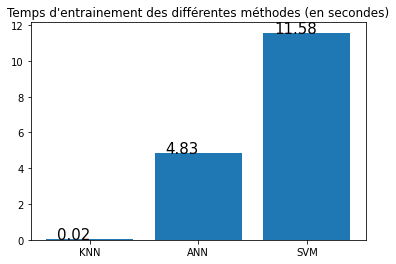

In [36]:
plt.figure()
times = [time_KNN, time_ANN, time_SVM]
plt.bar(["KNN", "ANN", "SVM"], times)
plt.text(x=-0.3 , y =time_KNN , s=f"{round(time_KNN, 2)}" , fontdict=dict(fontsize=15))
plt.text(x=0.7 , y =time_ANN , s=f"{round(time_ANN, 2)}" , fontdict=dict(fontsize=15))
plt.text(x=1.7 , y =time_SVM , s=f"{round(time_SVM, 2)}" , fontdict=dict(fontsize=15))
plt.title("Temps d'entrainement des différentes méthodes (en secondes)")
plt.show()

Nous pouvons très nettement apercevoir ci-dessus la différence des temps d'entrainements entre les différentes méthodes.
Bien qu'elle soit la méthode la plus précise, la méthode SVM est aussi la méthode prenant le plus grand temps d'entraînement, avec un apprentissage 580x plus long que la 2ème méthode la plus précise, les K-Plus proches voisins.
Les réseaux de neurones artificiels possèdent un temps d'apprentissage intéressant, environ 2x plus court que la méthode des SVM, mais nécessité tout de même 241x plus de temps d'apprentissages que la méthode des KNN.

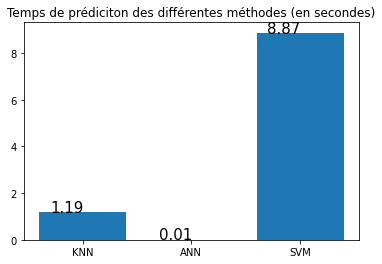

In [39]:
plt.figure()
times_pred = [time_KNN_pred, time_ANN_pred, time_SVM_pred]
plt.bar(["KNN", "ANN", "SVM"], times_pred)
plt.text(x=-0.3 , y =time_KNN_pred , s=f"{round(time_KNN_pred, 2)}" , fontdict=dict(fontsize=15))
plt.text(x=0.7 , y =time_ANN_pred , s=f"{round(time_ANN_pred, 2)}" , fontdict=dict(fontsize=15))
plt.text(x=1.7 , y =time_SVM_pred , s=f"{round(time_SVM_pred, 2)}" , fontdict=dict(fontsize=15))
plt.title("Temps de prédiciton des différentes méthodes (en secondes)")
plt.show()

Ci-dessus, nous nous apercevons que, encore une fois, lors des prédictions des données de tests, la méthode SVM est encore une fois la plus longue à l'exécution, nécessitant 887x plus de temps que la méthode la plus rapide, celle des ANN, avec un temps de prédiction d'un centième de seconde.
La méthode des KNN reste intéressante si nous regardons le temps d'apprentissages, de l'ordre d'une seconde, ce qui est négligeable si nous la comparons à la méthode SVM

## Conclusion de la comparaison

Pour conclure, nous pouvons voir que chacune des méthodes possède ses propres avantages et ses propres inconvénients.

La méthode des KNN est intéressante en terme de précision, de temps d'apprentissage ainsi qu'en temps de prédiction. Cette méthode est donc la plus polyvalente d'entre les 3, et peut correspondre à tout type de données, du moment à ce que les données doivent subir une classification et non une régression.

La méthode des ANN est la moins précise, possède un temps d'apprentissage moyen mais un temps de prédiction étant bien meilleur que les autres méthodes. Les ANN peuvent donc être utilisées dans les prédictions qui ne nécessitent pas forcément la plus grande des précisions, mais où beaucoup de données doivent être prédites. Si les prédictions sont à faire dans un grand nombre, cette méthode sera la plus adaptée.

La méthode des SVM est la plus précise, mais également la plus lente en terme de temps d'apprentissage et de prédiction. Cette méthode doit donc être réservée aux données où il n'y a pas un grand nombre de prédiction à faire, mais ou il y a un réel intérêt à avoir un grand taux de précision.

Si nous repronons l'exemple de la reconnaissance des chiffres manuscrits, qui peuvent être en grand nombre selon les cas, la méthode des KNN sera peut-être la méthode privilégiée, comparée à ses concurrents ANN et SVM qui seraient respectivement trop peu précis, et trop lent dans la prédiction pour être une méthode optimale.